In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}") # 60,000 images of 28x28 pixels
print(f"Testing data shape: {x_test.shape}")   # 10,000 images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


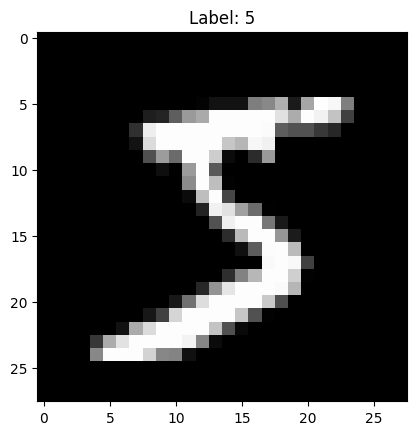

In [2]:
# Show the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [3]:
# 1. Flatten the 28x28 images into a 1D vector of 784 pixels
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# 2. Normalize pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"New flattened shape: {x_train.shape}")

New flattened shape: (60000, 784)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    # Hidden Layer 1: 512 neurons, learns basic shapes
    Dense(512, activation='relu', input_shape=(784,)),

    # Hidden Layer 2: 256 neurons, learns more complex patterns
    Dense(256, activation='relu'),

    # Output Layer: 10 neurons (one for each digit 0-9)
    # Softmax turns the output into probabilities
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for 5 epochs (passes through the data)
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9015 - loss: 0.3286 - val_accuracy: 0.9715 - val_loss: 0.0884
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9734 - loss: 0.0839 - val_accuracy: 0.9713 - val_loss: 0.0940
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9772 - val_loss: 0.0807
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9885 - loss: 0.0367 - val_accuracy: 0.9793 - val_loss: 0.0759
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9807 - val_loss: 0.0716


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9744 - loss: 0.1014
Final Test Accuracy: 97.91%


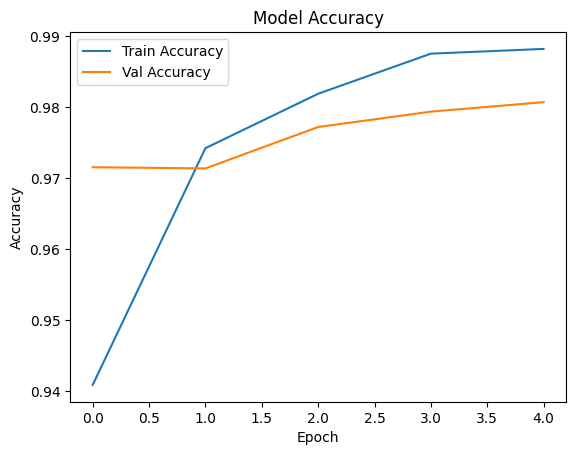

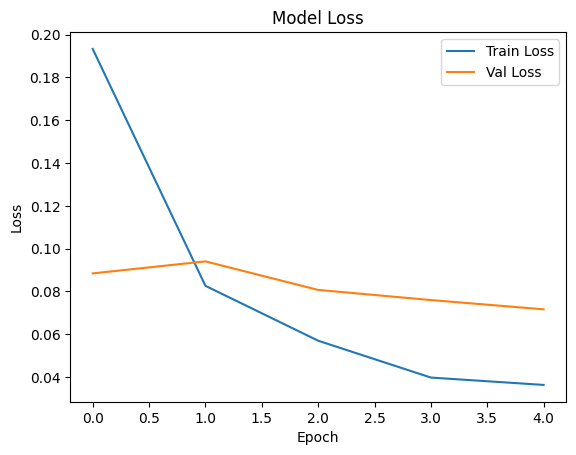

In [7]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


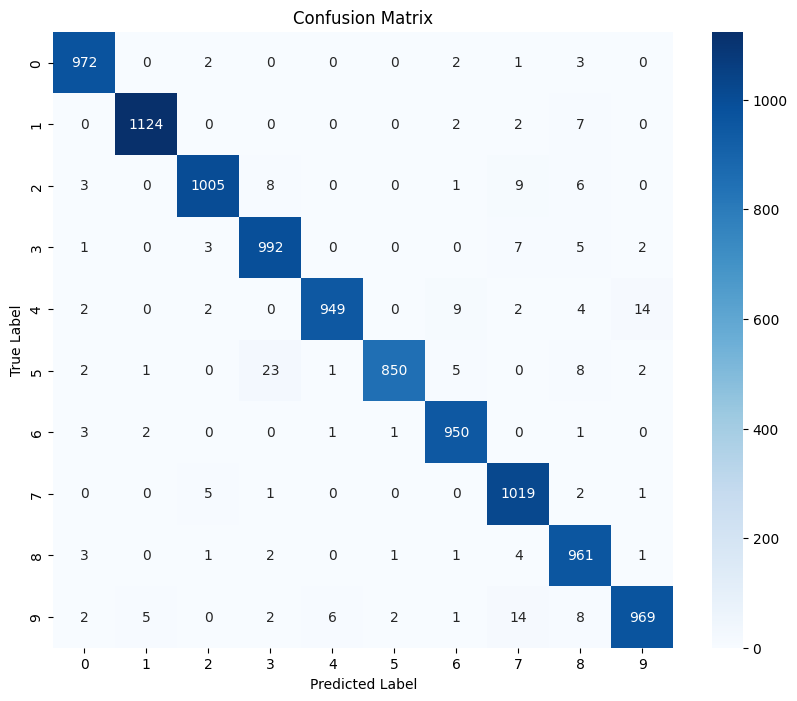

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Get the model's predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # Convert probabilities to class numbers

# 2. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Visualize it using a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train a simple Logistic Regression model
# We use a smaller subset or 'saga' solver for speed on 784 features
baseline_model = LogisticRegression(max_iter=100, solver='saga', tol=0.1)
baseline_model.fit(x_train, y_train)

# Evaluate
baseline_preds = baseline_model.predict(x_test)
baseline_acc = accuracy_score(y_test, baseline_preds)

print(f"MLP (Neural Network) Accuracy: {test_acc * 100:.2f}%")
print(f"Logistic Regression Accuracy: {baseline_acc * 100:.2f}%")

MLP (Neural Network) Accuracy: 97.91%
Logistic Regression Accuracy: 92.54%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
True Label: 1
Model Prediction: 1


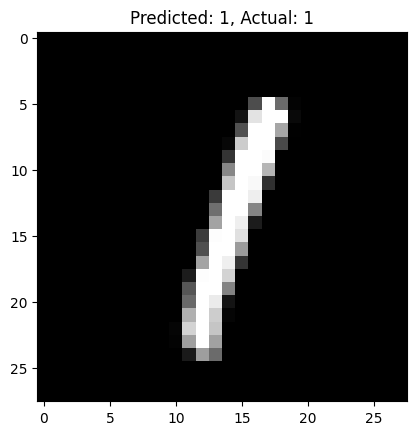

In [14]:
# Pick a random image from the test set
idx = 5
test_image = x_test[idx].reshape(1, 784) # Reshape for the model
true_label = y_test[idx]

# Predict
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

print(f"True Label: {true_label}")
print(f"Model Prediction: {predicted_label}")

# Display the image
plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.show()

In [13]:
# Save the model to a file
model.save('mnist_model.h5')

# Download it to your computer
from google.colab import files
files.download('mnist_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>